In [2]:
%pwd

'/home/nemanja/Desktop/Projects/Kaggle/House_Prices-Advanced_Regression_Techniques/house_price_kaggle/notebooks'

In [3]:
%cd ..

/home/nemanja/Desktop/Projects/Kaggle/House_Prices-Advanced_Regression_Techniques/house_price_kaggle


In [10]:
import pandas as pd 
import numpy as np

from fastai.imports import *     # We are data scientists prototyping models. This is not production code!
from fastai.structured import *  # Importing everything and having everything available is quicker and more useful

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

from plotnine import *

from our_io import load_dataset

In [305]:
df_raw = pd.read_csv("data/train.csv") 

In [306]:
df_raw.MSSubClass = df_raw.MSSubClass.astype('object')

In [307]:
def display_all(df):
    with pd.option_context("display.max_rows", 2000, "display.max_columns", 100): 
        display(df)

In [308]:
display_all(df_raw.iloc[:100])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [309]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [310]:
df_raw.sort_values(by=['YrSold'], inplace=True, ascending=True)
#df_raw['YrSold'].tail(70)

In [311]:
train_cats(df_raw)

In [312]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [313]:
df_raw.reset_index(inplace=True, drop=True)
df_raw.drop(axis=1,columns=['Id','PoolQC','MiscFeature','Fence','Alley','FireplaceQu'],inplace=True)


In [37]:
df_new = pd.DataFrame(load_dataset())#df_raw.query('YearRemodAdd>1940')

MasVnrArea
GarageYrBlt
GarageCars
GarageQual


In [38]:
df, y, nas = proc_df(df_new, 'SalePrice')
df.shape

(1460, 276)

In [39]:
df = df_raw.query('YearRemodAdd>1940')

NameError: name 'df_raw' is not defined

In [40]:
#A bit of feature engineering
df['Age'] = df['YrSold']-df['YearBuilt']
df['Garage'] = df['GarageArea']/df['GarageCars']
#df['QualityScore'] = df['OverallQual']*df['OverallCond']
df.drop(['GarageCars','GarageArea'],axis=1,inplace=True)
#df.drop(['MiscFeature','Fireplaces','Exterior2nd'],axis=1,inplace=True)
df['Garage'] = df['Garage'].fillna(0)
df['Qual'] = df['OverallQual']+df['OverallCond']
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
#df.drop(['OverallQual','OverallCond','TotalBsmtSF','1stFlrSF','2ndFlrSF','YearBuilt'],axis=1,inplace=True)


In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2, random_state=42)

In [42]:
#display_all(df.iloc[:1460])

In [43]:
#display_all(y[:1460])

In [44]:
def rmse(predictions, actuals): 
    return math.sqrt(((predictions - actuals)**2).mean())

def print_score(m):
    # RMSE for training, RMSE for validation, r^2 (accuracy) for training, r^2 for validation
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [45]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[17832.594208167415, 24203.050003068744, 0.9490610457860715, 0.9106485358194928, 0.8412167449561008]


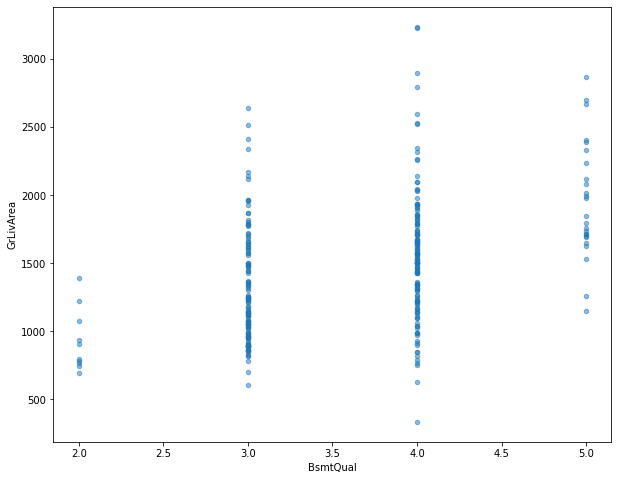

In [46]:
X_valid.plot('BsmtQual', 'GrLivArea', 'scatter', alpha=0.5, figsize=(10,8));

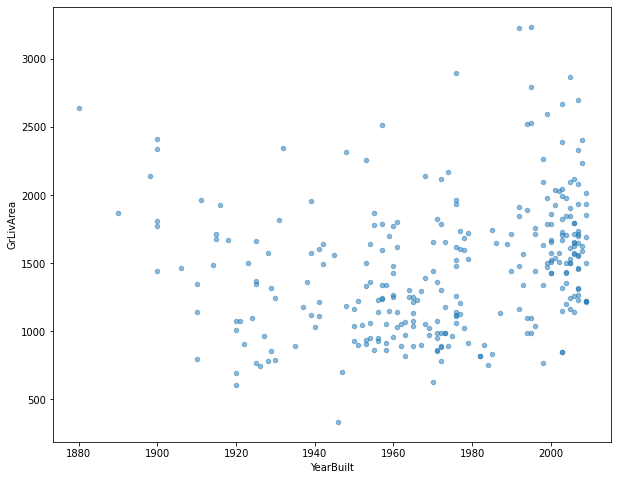

In [47]:
X_valid.plot('YearBuilt', 'GrLivArea', 'scatter', alpha=0.5, figsize=(10,8));

In [48]:
fi = rf_feat_importance(m, df)
fi[:20] # Top 10

,cols,imp
277,TotalSF,0.405535
99,OverallQual,0.238564
153,ExterQual,0.051048
196,GrLivArea,0.037151
161,BsmtQual,0.031560
101,YearBuilt,0.021186
194,2ndFlrSF,0.020613
276,Qual,0.016069
170,BsmtFinSF1,0.014974
274,Age,0.013944


In [49]:
to_keep = fi[fi.imp>0.01].cols
len(to_keep)

14

In [50]:
df_keep = df[to_keep].copy()
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.2, random_state=420)

In [51]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[18377.007019133962, 25847.704830994728, 0.9456040092659816, 0.8989067483104423, 0.8333431403979182]


In [52]:
fi = rf_feat_importance(m, df_keep)
fi[:18] # Top 10

,cols,imp
0,TotalSF,0.347028
1,OverallQual,0.272459
3,GrLivArea,0.056171
2,ExterQual,0.055225
9,Age,0.048365
7,Qual,0.038494
5,YearBuilt,0.036621
6,2ndFlrSF,0.027467
12,TotalBsmtSF,0.026467
11,LotArea,0.024409


In [53]:
from scipy.cluster import hierarchy as hc
scipy.__version__

'1.4.1'

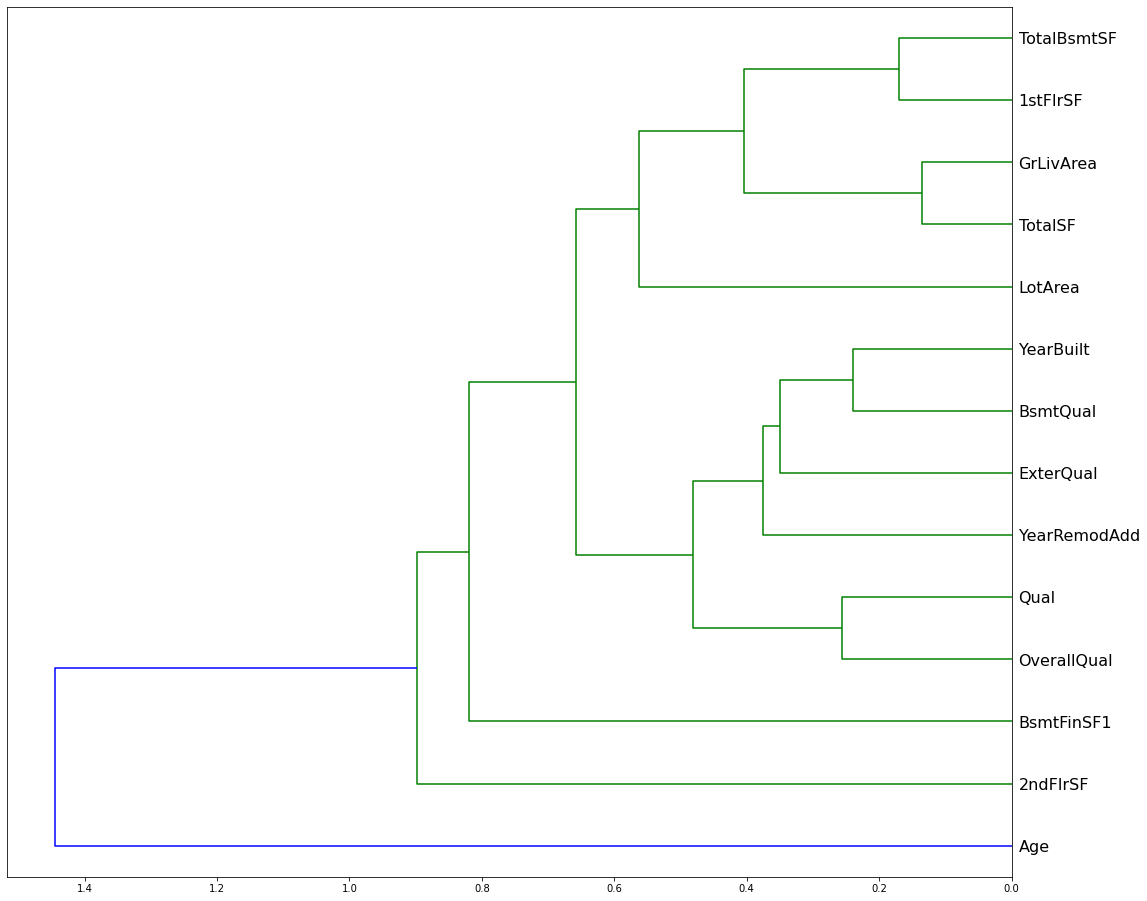

In [54]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4) # correlation matrix
corr_condensed = hc.distance.squareform(1-corr)                # distances matrix
z = hc.linkage(corr_condensed, method='average')               # hierarchical/agglomerative clustering

fig = plt.figure(figsize=(18,16))
dendrogram = hc.dendrogram(z, labels = list(df_keep.columns), orientation='left', leaf_font_size=16)
plt.show()

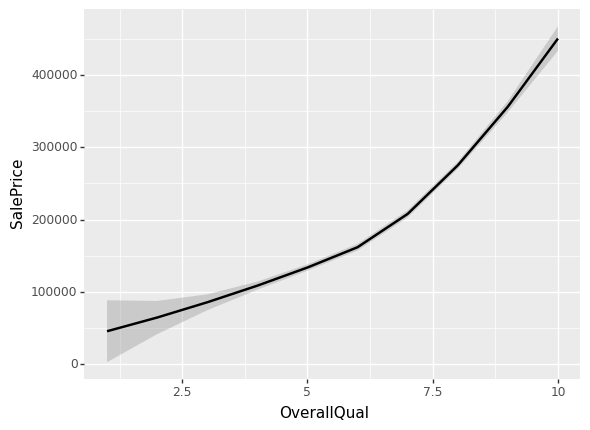

<ggplot: (-9223363267344292562)>

In [59]:
ggplot(df_new, aes('OverallQual','SalePrice'))+stat_smooth(se=True, method='loess')

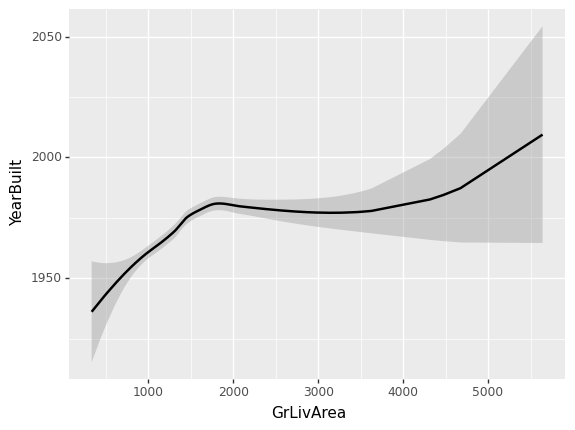

<ggplot: (8769510507198)>

In [60]:
ggplot(df_new, aes('GrLivArea','YearBuilt'))+stat_smooth(se=True, method='loess')

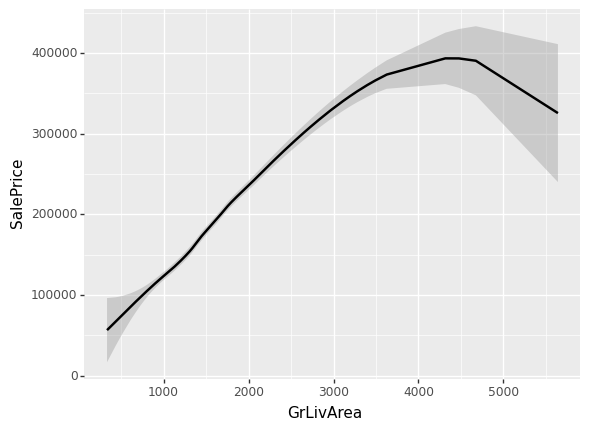

<ggplot: (-9223363267344494939)>

In [62]:
ggplot(df_new, aes('GrLivArea','SalePrice'))+stat_smooth(se=True, method='loess')

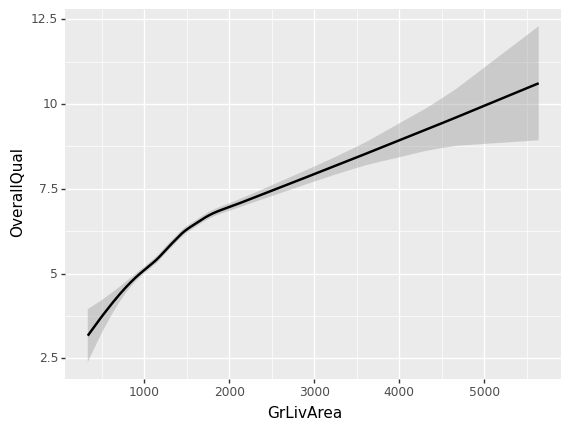

<ggplot: (8769510246734)>

In [63]:
ggplot(df_new, aes('GrLivArea','OverallQual'))+stat_smooth(se=True, method='loess')

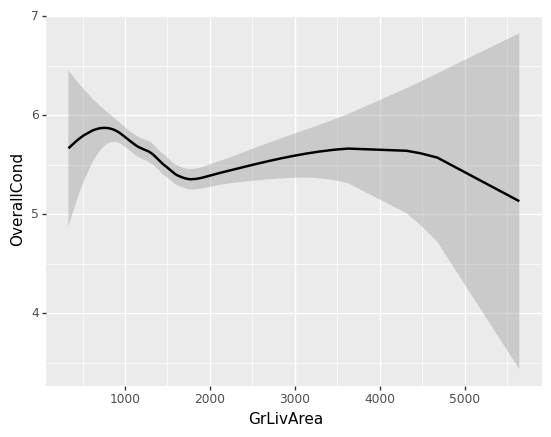

<ggplot: (-9223363267344542499)>

In [64]:
ggplot(df_new, aes('GrLivArea','OverallCond'))+stat_smooth(se=True, method='loess')

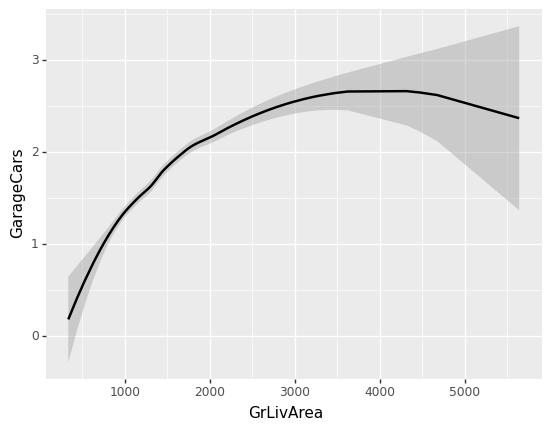

<ggplot: (-9223363267344477338)>

In [65]:
ggplot(df_new, aes('GrLivArea','GarageCars'))+stat_smooth(se=True, method='loess')

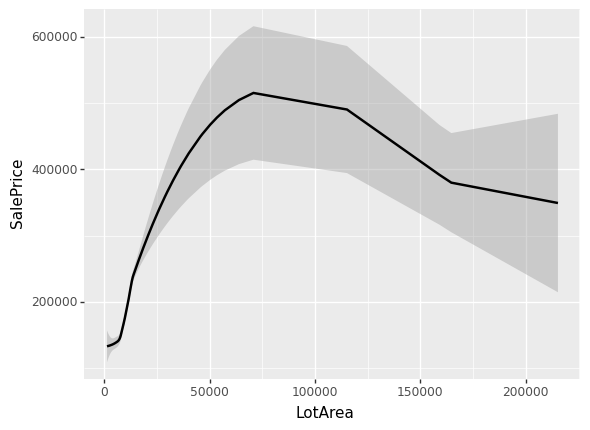

<ggplot: (-9223363267344542541)>

In [66]:
ggplot(df_new, aes('LotArea','SalePrice'))+stat_smooth(se=True, method='loess')

In [116]:
pip install plotnine

     |████████████████████████████████| 4.4 MB 31 kB/s  eta 0:00:01
  Using cached matplotlib-3.3.3-cp38-cp38-manylinux1_x86_64.whl (11.6 MB)
     |████████████████████████████████| 62 kB 296 kB/s eta 0:00:011
     |████████████████████████████████| 9.7 MB 87 kB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 3.7 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.0
    Uninstalling matplotlib-3.1.0:
      Successfully uninstalled matplotlib-3.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

apache-airflow 1.10.10 requires catt

In [67]:
from plotnine import ggplot, aes, geom_line, stat_smooth

In [123]:
pip install scikit-misc

     |████████████████████████████████| 8.7 MB 57 kB/s  eta 0:00:01
You should consider upgrading via the '/home/nemanja/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


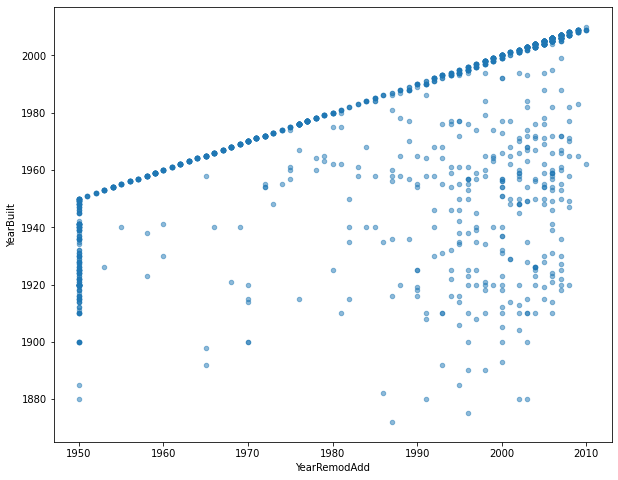

In [69]:
df_new.plot('YearRemodAdd', 'YearBuilt', 'scatter', alpha=0.5, figsize=(10,8));

In [70]:
df_raw.GrLivArea

NameError: name 'df_raw' is not defined

In [71]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.25, random_state=420)
    m.fit(X_train, y_train)
    return m.oob_score_

In [73]:
get_oob(df_keep)

0.8327458120682233

In [74]:
for c in ('FireplaceQu', 'Fireplaces', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

KeyError: "['FireplaceQu'] not found in axis"

In [235]:
df_keep.drop('FireplaceQu',axis=1,inplace=True)

In [75]:
df_keep.drop('GarageArea',axis=1,inplace=True)

KeyError: "['GarageArea'] not found in axis"

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.2, random_state=420)

In [77]:
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[17696.68422813666, 25541.887550323067, 0.9495569739354056, 0.9012847676919713, 0.8553369134607236]


In [79]:
import xgboost as xgb

In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(df_new, y, test_size=0.2, random_state=420)

In [81]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [82]:
dtest = xgb.DMatrix(X_valid, label=y_valid)

In [83]:
param = {'max_depth': 5, 'eta': 0.015}
param['nthread'] = 4
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 5000
bst = xgb.train(param, dtrain, num_round, evallist)

29907	train-rmse:2.09350
[4575]	eval-rmse:3176.29907	train-rmse:2.09184
[4576]	eval-rmse:3176.29932	train-rmse:2.09071
[4577]	eval-rmse:3176.29907	train-rmse:2.08900
[4578]	eval-rmse:3176.29907	train-rmse:2.08852
[4579]	eval-rmse:3176.29907	train-rmse:2.08753
[4580]	eval-rmse:3176.29907	train-rmse:2.08639
[4581]	eval-rmse:3176.29907	train-rmse:2.08599
[4582]	eval-rmse:3176.29907	train-rmse:2.08504
[4583]	eval-rmse:3176.29907	train-rmse:2.08457
[4584]	eval-rmse:3176.29907	train-rmse:2.08404
[4585]	eval-rmse:3176.29907	train-rmse:2.08279
[4586]	eval-rmse:3176.29907	train-rmse:2.08123
[4587]	eval-rmse:3176.29932	train-rmse:2.08095
[4588]	eval-rmse:3176.29907	train-rmse:2.08021
[4589]	eval-rmse:3176.29907	train-rmse:2.07981
[4590]	eval-rmse:3176.29932	train-rmse:2.07911
[4591]	eval-rmse:3176.29932	train-rmse:2.07871
[4592]	eval-rmse:3176.29932	train-rmse:2.07793
[4593]	eval-rmse:3176.29932	train-rmse:2.07701
[4594]	eval-rmse:3176.29932	train-rmse:2.07609
[4595]	eval-rmse:3176.29932	train-r